
# Textured images with spectral variations

.. codeauthor:: Frédéric Richard <frederic.richard_at_univ-amu.fr>

In this example, we show how to simulate a field having a topothesy whose
values may vary depending both on the direction and the amplitude.


<div class="alert alert-info"><h4>Note</h4><p>The obtained simulation relates to a model with a semi-variogram
    of the form:

    .. math::
        v(x) = \int_{\mathbb{R}^2} \vert e^{i\langle x, w \rangle} - 1 \vert^2
        \tau(w) \vert w \vert^{2H-2} dw.

    where, contrarily to usual AFBF, the value $\tau(w)$ does not only
    depend on the direction $\arg(w)$ of $w$,
    but also on its amplitude $\vert w \vert$.</p></div>


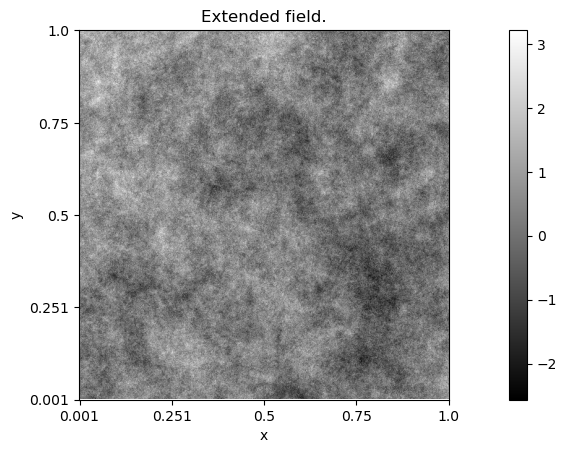

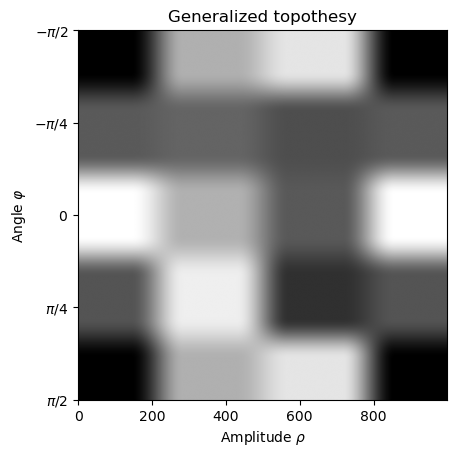

In [1]:
import numpy as np
from afbf import perfunction, tbfield
from matplotlib import pyplot as plt

nb_angle = 4  # Number of angle subdivisions.
nb_spect = 3  # Number of spectrum subdivisions.

# Definition of a fractional Brownian field.
Z = tbfield('fbf')
Z.hurst.ChangeParameters(
    np.array([0.1])
    )
Z.NormalizeModel()


Z.ExtendTopothesy(nb_spect, nb_angle)
for j in range(nb_spect):
    # Set uniformly spaced interval for the step functions.
    Z.gtopo[j].SetUniformStepInterval()

np.random.seed(1)
z = Z.Simulate()
z.name = 'Extended field.'
z.Display(1)


# Visualize the generalized topothesy.
gtopo = perfunction('step-smooth', nb_spect)  # Topothesy at an angle.
gtopo.SetUniformStepInterval()

z = np.linspace(-np.pi / 2, np.pi / 2, 1000)
im = np.zeros((z.size, z.size))
for i in range(z.size):
    # Setting parameters of the topothesy at angle z[i]
    for j in range(nb_spect):
        Z.gtopo[j].Evaluate(np.array([z[i]]))
        # The value of Z.gtopo[j] at z[i] gives the values of the jth
        # parameter of the generalized topothesy at the ith angle.
        gtopo.fparam[0, j] = Z.gtopo[j].values[0, 0]

    # Evaluate the topothesy at angle z[i]
    gtopo.Evaluate(z)
    im[i, :] = gtopo.values.reshape((1, z.size))

plt.figure(2)
plt.imshow(im, cmap='gray')
plt.title('Generalized topothesy')
plt.xlabel(r'Amplitude $\rho$')
plt.ylabel(r'Angle $\varphi$')
loc, lab = plt.yticks(
    np.linspace(0, z.size, 5),
    [r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$', r'$\pi/2$']
    )